In [2]:
#1.Copy the code from the lesson to create a dataframe full of student grades.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from pydataset import data

import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades})

type(df)



pandas.core.frame.DataFrame

In [3]:
#look at df
df.head()

,name,math,english,reading
0,Sally,62,85,80
1,Jane,88,79,67
2,Suzie,94,74,95
3,Billy,98,96,88
4,Ada,77,92,98


In [4]:
df.shape

(12, 4)

In [5]:
df.info

<bound method DataFrame.info of        name  math  english  reading
0     Sally    62       85       80
1      Jane    88       79       67
2     Suzie    94       74       95
3     Billy    98       96       88
4       Ada    77       92       98
5      John    79       76       93
6    Thomas    82       64       81
7     Marie    93       63       90
8    Albert    92       62       87
9   Richard    69       80       94
10    Isaac    92       99       93
11     Alan    92       62       72>

In [6]:
# use describe method to produce descriptive statistics for columns with numeric datatypes

df.describe()

,math,english,reading
count,12.000000,12.000000,12.000000
mean,84.833333,77.666667,86.500000
std,11.134168,13.371158,9.643651
min,62.000000,62.000000,67.000000
25%,78.500000,63.750000,80.750000
50%,90.000000,77.500000,89.000000
75%,92.250000,86.750000,93.250000
max,98.000000,99.000000,98.000000


In [7]:
 #a. Create a column named passing_english that indicates whether each student has a passing grade in english.
df['passing_english'] = df.english >= 70

In [8]:
df.head

<bound method NDFrame.head of        name  math  english  reading  passing_english
0     Sally    62       85       80             True
1      Jane    88       79       67             True
2     Suzie    94       74       95             True
3     Billy    98       96       88             True
4       Ada    77       92       98             True
5      John    79       76       93             True
6    Thomas    82       64       81            False
7     Marie    93       63       90            False
8    Albert    92       62       87            False
9   Richard    69       80       94             True
10    Isaac    92       99       93             True
11     Alan    92       62       72            False>

In [16]:
df['passing_english'].sum()

8

In [9]:
(df['passing_english'] == False).sum()

4

In [10]:
#b.Sort the english grades by the passing_english column. 
#How are duplicates handled?
df.sort_values(by=['passing_english', 'name'])

,name,math,english,reading,passing_english
11,Alan,92,62,72,False
8,Albert,92,62,87,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
4,Ada,77,92,98,True
3,Billy,98,96,88,True
10,Isaac,92,99,93,True
1,Jane,88,79,67,True
5,John,79,76,93,True
9,Richard,69,80,94,True


In [19]:
#c. Sort the english grades first by passing_english and then by student name.
#All the students that are failing english should be first,
#and within the students that are failing english they should be ordered alphabetically.
df.sort_values(by='passing_english')

,name,math,english,reading,passing_english
6,Thomas,82,64,81,False
7,Marie,93,63,90,False
8,Albert,92,62,87,False
11,Alan,92,62,72,False
0,Sally,62,85,80,True
1,Jane,88,79,67,True
2,Suzie,94,74,95,True
3,Billy,98,96,88,True
4,Ada,77,92,98,True
5,John,79,76,93,True


In [11]:

df.sort_values(by=['passing_english', 'name'], ascending=[False, True])

,name,math,english,reading,passing_english
4,Ada,77,92,98,True
3,Billy,98,96,88,True
10,Isaac,92,99,93,True
1,Jane,88,79,67,True
5,John,79,76,93,True
9,Richard,69,80,94,True
0,Sally,62,85,80,True
2,Suzie,94,74,95,True
11,Alan,92,62,72,False
8,Albert,92,62,87,False


In [23]:
#d.Sort the english grades first by passing_english, 
#and then by the actual english grade, similar to how we did in the last step.
df.sort_values(by=['passing_english', 'english'])

,name,math,english,reading,passing_english
8,Albert,92,62,87,False
11,Alan,92,62,72,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
2,Suzie,94,74,95,True
5,John,79,76,93,True
1,Jane,88,79,67,True
9,Richard,69,80,94,True
0,Sally,62,85,80,True
4,Ada,77,92,98,True


In [12]:
#e. Calculate each students overall grade and add it as a column on the dataframe. 
#The overall grade is the average of the math, english, and reading grades.

In [13]:
df.sum()

name               SallyJaneSuzieBillyAdaJohnThomasMarieAlbertRichardIsaacAlan
math                                                                      1018
english                                                                    932
reading                                                                   1038
passing_english                                                              8
dtype: object

In [14]:
df.sum(axis=1)

0     228.0
1     235.0
2     264.0
3     283.0
4     268.0
5     249.0
6     227.0
7     246.0
8     241.0
9     244.0
10    285.0
11    226.0
dtype: float64

In [15]:
df['overall_average'] = (df.sum(axis=1) / 3).astype('int')
df.head()

,name,math,english,reading,passing_english,overall_average
0,Sally,62,85,80,True,76
1,Jane,88,79,67,True,78
2,Suzie,94,74,95,True,88
3,Billy,98,96,88,True,94
4,Ada,77,92,98,True,89


In [17]:
#2.Load the mpg dataset. Read the documentation for the dataset and use it for the following questions:
from pydataset import data

In [16]:
# data('mpg', show_doc=True) # view the documentation for the dataset
mpg = data('mpg') # load the dataset and store it in a variable
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [18]:
#How many rows and columns are there?(234 Rows/ 11 columns)
mpg.shape 

(234, 11)

In [19]:
#What are the data types of each column?
mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [20]:
#Summarize the dataframe with .info and .describe
mpg.info

<bound method DataFrame.info of     manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
1           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
2           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
3           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
4           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
5           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
1    compact  
2    compact  
3    compact  
4    co

In [21]:
mpg.describe

<bound method NDFrame.describe of     manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
1           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
2           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
3           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
4           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
5           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
1    compact  
2    compact  
3    compact  
4    

In [27]:
#Rename the cty column to city.
mpg.rename(columns={'cty': 'city'}, inplace=True)

In [28]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [30]:
#Rename the hwy column to highway.
mpg.rename(columns={'hwy': 'highway'},inplace=True)

In [31]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [32]:
#Do any cars have better city mileage than highway mileage?
bool_series = mpg.city > mpg.highway
bool_series.head()

1    False
2    False
3    False
4    False
5    False
dtype: bool

In [34]:
bool_series.sum()

0

In [35]:
#Create a column named mileage_difference this column should contain the difference between highway and city mileage for each car.
mpg = mpg.assign(mileage_difference = mpg.highway - mpg.city)

In [36]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10


In [42]:
#Which car (or cars) has the highest mileage difference?
mpg = mpg.assign(mileage_difference = mpg.highway - mpg.city)
mpg.mileage_difference.max()

12

In [45]:
#Which compact class car has the lowest highway mileage? The best?
mpg = mpg.assign(mileage_difference = mpg.highway - mpg.city)
mpg.mileage_difference.min()

2

In [48]:
#best
mpg.sort_values(by='highway', ascending=False)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,9
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,12
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,9
106,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,11
...,...,...,...,...,...,...,...,...,...,...,...,...
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,3
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,3
127,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,3
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,3


In [49]:
#Create a column named average_mileage that is the mean of the city and highway mileage.
(mpg.city + mpg.highway) / 2

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Length: 234, dtype: float64

In [50]:
mpg['average_mileage'] = (mpg.city + mpg.highway) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0


In [ ]:
#Which dodge car has the best average mileage? The worst?

In [51]:
bool_series = mpg.manufacturer == 'dodge'
bool_series.head()

1    False
2    False
3    False
4    False
5    False
Name: manufacturer, dtype: bool

In [52]:
dodges = mpg[bool_series]
dodges.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
38,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan,6,21.0
39,dodge,caravan 2wd,3.0,1999,6,auto(l4),f,17,24,r,minivan,7,20.5
40,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan,6,19.0
41,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan,6,19.0
42,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan,7,20.5


In [53]:
#  Dodge with the best average mileage.

dodges.sort_values(by='average_mileage').tail(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
38,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan,6,21.0


In [54]:
#Dodge with the worst average mileage.

dodges.sort_values(by='average_mileage').head(4)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,3,10.5
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,3,10.5
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,3,10.5
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,3,10.5


In [55]:
#Load the Mammals dataset. Read the documentation for it, and use the data to answer these questions:
data('Mammals', show_doc=True)

Mammals

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Garland(1983) Data on Running Speed of Mammals

### Description

Observations on the maximal running speed of mammal species and their body
mass.

### Usage

    data(Mammals)

### Format

A data frame with 107 observations on the following 4 variables.

weight

Body mass in Kg for "typical adult sizes"

speed

Maximal running speed (fastest sprint velocity on record)

hoppers

logical variable indicating animals that ambulate by hopping, e.g. kangaroos

specials

logical variable indicating special animals with "lifestyles in which speed
does not figure as an important factor": Hippopotamus, raccoon (Procyon),
badger (Meles), coati (Nasua), skunk (Mephitis), man (Homo), porcupine
(Erithizon), oppossum (didelphis), and sloth (Bradypus)

### Details

Used by Chappell (1989) and Koenker, Ng and Portnoy (1994) to illustrate the
fitting of piecewise linear curves.

### Source

Garland, T. (

In [56]:
mammals = data('Mammals')

In [57]:
mammals.head()

,weight,speed,hoppers,specials
1,6000.0,35.0,False,False
2,4000.0,26.0,False,False
3,3000.0,25.0,False,False
4,1400.0,45.0,False,False
5,400.0,70.0,False,False


In [58]:
#How many rows and columns are there?
mammals.shape

(107, 4)

In [59]:
#What are the data types?
mammals.dtypes

weight      float64
speed       float64
hoppers        bool
specials       bool
dtype: object

In [60]:
#Summarize the dataframe with .info and .describe
mammals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 1 to 107
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   weight    107 non-null    float64
 1   speed     107 non-null    float64
 2   hoppers   107 non-null    bool   
 3   specials  107 non-null    bool   
dtypes: bool(2), float64(2)
memory usage: 2.7 KB


In [61]:
mammals.describe()

,weight,speed
count,107.000000,107.000000
mean,278.688178,46.208411
std,839.608269,26.716778
min,0.016000,1.600000
25%,1.700000,22.500000
50%,34.000000,48.000000
75%,142.500000,65.000000
max,6000.000000,110.000000


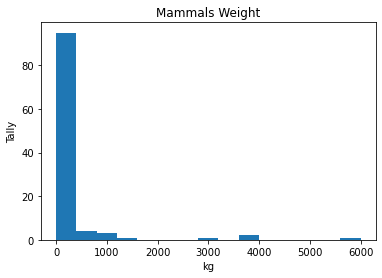

In [70]:
#Visualization of data(weight)
plt.hist(mammals.weight,bins=15)
plt.title('Mammals Weight')
plt.xlabel('kg')
plt.ylabel('Tally')

plt.show()

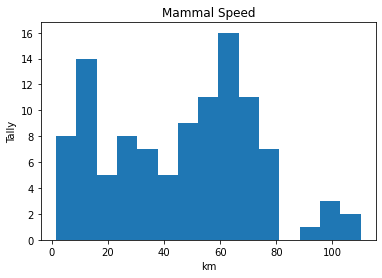

In [69]:
#visualization of data(speed)
plt.hist(mammals.speed, bins=15)
plt.title('Mammal Speed')
plt.xlabel('km')
plt.ylabel('Tally')

plt.show()

In [71]:
#What is the the weight of the fastest animal?
#fastest speed
(mammals.speed).max()

110.0

In [72]:
#Speed boolean series 

filt = mammals.speed == (mammals.speed).max()
filt

1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53      True
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False
77     False

In [73]:
mammals[filt]

,weight,speed,hoppers,specials
53,55.0,110.0,False,False


In [74]:
#What is the overal percentage of specials?
mammals.specials

1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10      True
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59      True
60      True
61     False
62     False
63     False
64     False
65      True
66      True
67     False
68      True
69      True
70      True
71     False
72     False
73     False
74     False
75     False
76     False
77     False

In [76]:
special_mammals = mammals.specials.sum()
special_mammals

10

In [78]:
#find percentage
whole_ark = len(mammals)
whole_ark

107

In [79]:
print(f'{round(special_mammals / whole_ark * 100, 2)}% of the mammals are considered as specials.')

9.35% of the mammals are considered as specials.


In [82]:
#How many animals are hoppers that are above the median speed? What percentage is this?
#find median speed
median_speed = median_speed = mammals.speed.median()
median_speed

48.0

In [83]:
#boolean series
bool_series = (mammals.speed > median_speed) & (mammals.hoppers == True)
bool_series.head()

1    False
2    False
3    False
4    False
5    False
dtype: bool

In [84]:
#find hoppers above the median
quick_hops = mammals[bool_series]
quick_hops 

,weight,speed,hoppers,specials
96,4.6,64.0,True,False
97,4.4,72.0,True,False
98,4.0,72.0,True,False
99,3.5,56.0,True,False
100,2.0,64.0,True,False
101,1.9,56.0,True,False
102,1.5,50.0,True,False


In [85]:
#find howw many hoppers there are
len(quick_hops)

7

In [86]:
#Find percentage
print(f'The quickest hoppers are the fastest {round((len(quick_hops) / len(mammals)) * 100, 2)}% of the mammals.')

the quickest hoppers are the fastest 6.54% of the mammals.
